# Computational Final Project

## Setup and Imports

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
from textblob import TextBlob
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datasketch import MinHash, MinHashLSH
from sklearn.feature_extraction.text import TfidataVectorizer
from sklearn.decomposition import PCA
from collections import Counter
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import contractions


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading and Preprocessing the Data

In [18]:
data = pd.read_csv("../data/fake reviews dataset.csv")

data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [19]:
unique_catgory = data['category'].unique()
print(unique_catgory)

['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [20]:
data = data.rename(columns={'text_':'text'})
data['category']=data['category'].str.replace('_5','',regex=False)

In [22]:
data.isnull().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [23]:
data.duplicated().sum()

12

In [24]:
data.drop_duplicates()

,category,rating,label,text
0,Home_and_Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen,5,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry,5,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry,2,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry,1,CG,I liked nothing about this dress. The only rea...


In [25]:
data['label_binary'] = data['label'].replace({'CG': 1, 'OR': 0})

In [31]:
data['processed_text']=(data['text']).apply(contractions.fix)
# Loop through each line of text and tokenize
data['processed_text'] = [word_tokenize(line) for line in data['processed_text']]

In [33]:
import string

def remove_punctuation(input_text):
    return [token for token in input_text if token not in set(string.punctuation)]

# Apply punctuation function
data['processed_text'] = [remove_punctuation(line) for line in data['processed_text']]

In [35]:
nltk.download('stopwords')

def remove_stopwords(input_text):
    return [token for token in input_text if token.lower() not in stopwords.words('english')]

# Apply stopword function
data['processed_text'] = [remove_stopwords(line) for line in data['processed_text']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#lemmazation
def lemmatize(input_text):
    # Instantiate class
    lem = WordNetLemmatizer()
    # Lemmatized text becomes input inside all loop runs
    lemmatized_text = input_text
    # Lemmatize each part of speech
    for part_of_speech in ['n', 'v', 'a', 'r', 's']:
        lemmatized_text = [lem.lemmatize(token, part_of_speech).lower() for token in lemmatized_text]
    return lemmatized_text

# Apply lemmatize function
data['processed_text'] = [lemmatize(line) for line in data['processed_text']]

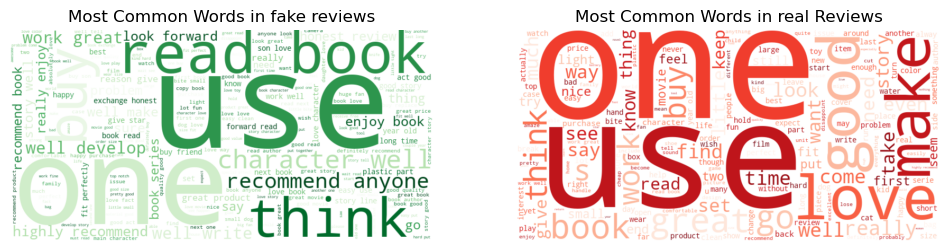

In [37]:
# Separate CG and OR reviews
cg_text = ' '.join([' '.join(words) for words in data[data['label'] == 'CG']['processed_text']])
or_text = ' '.join([' '.join(words) for words in data[data['label'] == 'OR']['processed_text']])

# Generate word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cg_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(cg_text)
plt.imshow(cg_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in fake reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
or_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(or_text)
plt.imshow(or_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in real Reviews')
plt.axis('off')

plt.show()

In [38]:
data

,category,rating,label,text,label_binary,processed_text
0,Home_and_Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...",1,"[love, well, make, sturdy, comfortable, love, ..."
1,Home_and_Kitchen,5,CG,"love it, a great upgrade from the original. I...",1,"[love, great, upgrade, original, mine, couple,..."
2,Home_and_Kitchen,5,CG,This pillow saved my back. I love the look and...,1,"[pillow, save, back, love, look, feel, pillow]"
3,Home_and_Kitchen,1,CG,"Missing information on how to use it, but it i...",1,"[miss, information, use, great, product, price]"
4,Home_and_Kitchen,5,CG,Very nice set. Good quality. We have had the s...,1,"[nice, set, good, quality, set, two, month]"
...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4,OR,I had read some reviews saying that this bra r...,0,"[read, review, say, bra, run, small, order, tw..."
40428,Clothing_Shoes_and_Jewelry,5,CG,I wasn't sure exactly what it would be. It is ...,1,"[sure, exactly, would, little, large, small, s..."
40429,Clothing_Shoes_and_Jewelry,2,OR,"You can wear the hood by itself, wear it with ...",0,"[wear, hood, wear, hood, wear, jacket, without..."
40430,Clothing_Shoes_and_Jewelry,1,CG,I liked nothing about this dress. The only rea...,1,"[like, nothing, dress, reason, give, 4, star, ..."


In [39]:
from collections import Counter

# Define key words to track (can expand this list as needed)
key_words = ['love', 'great', 'good', 'bad', 'sturdy', 'comfortable']

# Add a column for each key word's frequency
for word in key_words:
    data[f'{word}_count'] = data['processed_text'].apply(lambda tokens: tokens.count(word))

# Feature: Total word count
data['total_word_count'] = data['processed_text'].apply(len)

# Feature: Unique word ratio
data['unique_word_ratio'] = data['processed_text'].apply(lambda tokens: len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0)

# Display updated dataset
print(data.head())


           category  rating label  \
0  Home_and_Kitchen       5    CG   
1  Home_and_Kitchen       5    CG   
2  Home_and_Kitchen       5    CG   
3  Home_and_Kitchen       1    CG   
4  Home_and_Kitchen       5    CG   

                                                text  label_binary  \
0  Love this!  Well made, sturdy, and very comfor...             1   
1  love it, a great upgrade from the original.  I...             1   
2  This pillow saved my back. I love the look and...             1   
3  Missing information on how to use it, but it i...             1   
4  Very nice set. Good quality. We have had the s...             1   

                                      processed_text  love_count  great_count  \
0  [love, well, make, sturdy, comfortable, love, ...           2            0   
1  [love, great, upgrade, original, mine, couple,...           1            1   
2     [pillow, save, back, love, look, feel, pillow]           1            0   
3    [miss, information, use, gr

In [40]:
data

,category,rating,label,text,label_binary,processed_text,love_count,great_count,good_count,bad_count,sturdy_count,comfortable_count,total_word_count,unique_word_ratio
0,Home_and_Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...",1,"[love, well, make, sturdy, comfortable, love, ...",2,0,0,0,1,1,7,0.857143
1,Home_and_Kitchen,5,CG,"love it, a great upgrade from the original. I...",1,"[love, great, upgrade, original, mine, couple,...",1,1,0,0,0,0,7,1.000000
2,Home_and_Kitchen,5,CG,This pillow saved my back. I love the look and...,1,"[pillow, save, back, love, look, feel, pillow]",1,0,0,0,0,0,7,0.857143
3,Home_and_Kitchen,1,CG,"Missing information on how to use it, but it i...",1,"[miss, information, use, great, product, price]",0,1,0,0,0,0,6,1.000000
4,Home_and_Kitchen,5,CG,Very nice set. Good quality. We have had the s...,1,"[nice, set, good, quality, set, two, month]",0,0,1,0,0,0,7,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4,OR,I had read some reviews saying that this bra r...,0,"[read, review, say, bra, run, small, order, tw...",0,0,2,0,0,1,157,0.719745
40428,Clothing_Shoes_and_Jewelry,5,CG,I wasn't sure exactly what it would be. It is ...,1,"[sure, exactly, would, little, large, small, s...",1,2,0,0,0,3,116,0.603448
40429,Clothing_Shoes_and_Jewelry,2,OR,"You can wear the hood by itself, wear it with ...",0,"[wear, hood, wear, hood, wear, jacket, without...",0,0,1,0,0,0,196,0.765306
40430,Clothing_Shoes_and_Jewelry,1,CG,I liked nothing about this dress. The only rea...,1,"[like, nothing, dress, reason, give, 4, star, ...",3,1,1,0,0,3,128,0.523438


## Feature Engineering

#### Text-based Features
1 - Text Length: Calculate the length of each review.
2 - Sentiment Score: You could use TextBlob to get the sentiment score.

In [42]:
from textblob import TextBlob

# Feature: Text length
data['text_length'] = data['text'].apply(len)

# Feature: Sentiment score
data['sentiment_score'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


##### Summary of text_length and sentiment_score in Anomaly Detection

High Variability in Genuine Reviews: Original (OG) reviews are likely to vary in both text_length and sentiment_score, as they reflect diverse user experiences.

Patterns in Fake Reviews: Fake (CG) reviews might follow patterns, such as being consistently short, overly positive, or similarly structured, which these features can capture.

Detecting Anomalies: Using both text_length and sentiment_score as features helps anomaly detection models (like Isolation Forest) spot reviews that deviate from the natural distribution of genuine reviews.

These features are therefore essential as they capture both structural (text length) and emotional (sentiment) aspects of the reviews, allowing for a nuanced approach to detecting computer-generated reviews.

#### Rating-based Features
1 - Rating Deviation: Calculate the deviation of each rating from the average rating for that category

In [43]:
# Calculate the mean rating per category
category_avg_rating = data.groupby('category')['rating'].transform('mean')

# Feature: Rating deviation
data['rating_deviation'] = data['rating'] - category_avg_rating


#### Category Encoding
Encode the category column to use in the model.

In [44]:
# One-hot encoding for category
data = pd.get_dummies(data, columns=['category'], drop_first=True)


In [46]:
data.dtypes

rating                                   int64
label                                   object
text                                    object
label_binary                             int64
processed_text                          object
love_count                               int64
great_count                              int64
good_count                               int64
bad_count                                int64
sturdy_count                             int64
comfortable_count                        int64
total_word_count                         int64
unique_word_ratio                      float64
text_length                              int64
sentiment_score                        float64
rating_deviation                       float64
category_Clothing_Shoes_and_Jewelry       bool
category_Electronics                      bool
category_Home_and_Kitchen                 bool
category_Kindle_Store                     bool
category_Movies_and_TV                    bool
category_Pet_

#### Final Feature Set

In [7]:
# Prepare the feature set for anomaly detection
features = data[['text_length', 'sentiment_score', 'rating', 'rating_deviation'] + [col for col in data.columns if col.startswith('category_')]]


## Standardize the Data
Standardize the feature data for improved model performance.

In [8]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Isolation Forest
The Isolation Forest is straightforward to implement and works well with tabular data.

#### 1. Initialize and Train the Isolation Forest

In [9]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the feature data
isolation_forest.fit(features_scaled)


IsolationForest(contamination=0.1, random_state=42)

#### 2. Anomaly Prediction

In [10]:
# Predict anomalies
anomaly_labels_if = isolation_forest.predict(features_scaled)
data['anomaly_label_if'] = anomaly_labels_if  # Store predictions in the dataset

# Calculate anomaly scores (the lower the score, the more anomalous)
anomaly_scores_if = isolation_forest.decision_function(features_scaled)
data['anomaly_score_if'] = anomaly_scores_if

#### 3. Evaluate and Interpret Isolation Forest Results

In [11]:
# Display a sample of predicted anomalies
anomalies_if = data[data['anomaly_label_if'] == -1]
print("Number of anomalies detected by Isolation Forest:", anomalies_if.shape[0])

# Filter for rows where label is 'CG' and count them
cg_count = data[data['label'] == 'CG'].shape[0]

print(f"Number of computer-generated (CG) reviews: {cg_count}")



Number of anomalies detected by Isolation Forest: 4044
Number of computer-generated (CG) reviews: 20216


From these results we can see that 4044 anomalies are detected by the Isolation Forest and it appears that the model flagged a substantial subset of reviews as suspicious based on their features. Given the dataset size, this number might represent a meaningful pattern in the data. Isolaton Forest detects anomalies without label knowledge, so there may or may not overlap with actual CG reviews. 

When we look at the CG-labelled reviews, we can see that there are 20216 datapoints of actual CG-labelled reviews. This represents a significant portion of the dataset, and it confimrs that many of the CG reviews might not have been detected as anomalies by the Isolation Forest.

## Next Steps for Analysis and Model Improvement

#### Overlap Analysis
Compare the Isolation Forest’s detected anomalies with the CG-labeled reviews to understand the overlap. This will help you see how well the Isolation Forest performed in detecting CG reviews:

In [12]:
# Check overlap between Isolation Forest anomalies and CG reviews
isolation_forest_anomalies = data[data['anomaly_label_if'] == -1]
cg_reviews = data[data['label'] == 'CG']

# Count reviews that are both anomalies and labeled as CG
overlap_count = isolation_forest_anomalies[isolation_forest_anomalies['label'] == 'CG'].shape[0]
print(f"Number of reviews flagged as anomalies and labeled as CG: {overlap_count}")


Number of reviews flagged as anomalies and labeled as CG: 1674


Interpretation: If the overlap is high, the Isolation Forest might be doing well at detecting CG reviews based on anomalies. If the overlap is low, it could mean that the features used by the Isolation Forest aren't fully capturing the characteristics of CG reviews.

#### Adjusting Isolation Forest Parameters:

Experiment with different values for contamination (proportion of anomalies) and n_estimators (number of trees) to see if you can improve the overlap with CG labels.

In [13]:
# Example: Adjust contamination to increase/decrease anomaly detection sensitivity
isolation_forest = IsolationForest(n_estimators=150, contamination=0.15, random_state=42)
isolation_forest.fit(features_scaled)
data['anomaly_label_if'] = isolation_forest.predict(features_scaled)


#### Exploring Feature Importance:

Since Isolation Forests work by splitting data across feature values, analyzing which features most contributed to the anomalies could provide insight. You could use feature importance methods to determine which features contribute most to the anomalies.

#### Combining Isolation Forest with PCA or Clustering:

If the overlap between Isolation Forest anomalies and CG reviews isn’t satisfactory, consider combining this method with PCA-based anomaly detection or clustering to capture more patterns indicative of CG reviews.

In [14]:
# Assuming the required libraries are already imported
# Additional imports if needed
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

## Step 1: Adding New Features

# Feature: Subjectivity score
data['subjectivity_score'] = data['text_'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Feature: Unique word count
data['unique_word_count'] = data['text_'].apply(lambda x: len(set(x.split())))

# Feature: Stopword ratio
data['stopword_ratio'] = data['text_'].apply(lambda x: sum(1 for word in x.split() if word in stop_words) / len(x.split()) if len(x.split()) > 0 else 0)

# The new features `subjectivity_score`, `unique_word_count`, and `stopword_ratio` are now added to the DataFrame.

## Step 2: Updating the Feature Set with New Features

# Prepare the feature set for anomaly detection including the new features
features = data[['text_length', 'sentiment_score', 'subjectivity_score', 'unique_word_count', 'stopword_ratio',
                 'rating', 'rating_deviation'] + [col for col in data.columns if col.startswith('category_')]]

## Step 3: Standardize the Data

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Step 4: Running Isolation Forest

from sklearn.ensemble import IsolationForest

# Initialize and train the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(features_scaled)

# Predict anomalies
anomaly_labels_if = isolation_forest.predict(features_scaled)
data['anomaly_label_if'] = anomaly_labels_if  # Store predictions in the dataset

# Calculate anomaly scores (the lower the score, the more anomalous)
anomaly_scores_if = isolation_forest.decision_function(features_scaled)
data['anomaly_score_if'] = anomaly_scores_if


# Display a sample of predicted anomalies
anomalies_if = data[data['anomaly_label_if'] == -1]
print("Number of anomalies detected by Isolation Forest:", anomalies_if.shape[0])

# Filter for rows where label is 'CG' and count them
cg_count = data[data['label'] == 'CG'].shape[0]

print(f"Number of computer-generated (CG) reviews: {cg_count}")

print(f"Anomaly Score (The lower the score, the more anomalous): {anomaly_scores_if}")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of anomalies detected by Isolation Forest: 4044
Number of computer-generated (CG) reviews: 20216
Anomaly Score (The lower the score, the more anomalous): [ 0.0318744   0.0754272   0.05653752 ... -0.07473668 -0.0785394
 -0.01424668]


In [15]:
# Check overlap between Isolation Forest anomalies and CG reviews
isolation_forest_anomalies = data[data['anomaly_label_if'] == -1]
cg_reviews = data[data['label'] == 'CG']

# Count reviews that are both anomalies and labeled as CG
overlap_count = isolation_forest_anomalies[isolation_forest_anomalies['label'] == 'CG'].shape[0]
print(f"Number of reviews flagged as anomalies and labeled as CG: {overlap_count}")

Number of reviews flagged as anomalies and labeled as CG: 1563


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 150, 200], 'contamination': [0.05, 0.1, 0.15]}
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(features_scaled)
print("Best Parameters:", grid_search.best_params_)


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__()

Best Parameters: {'contamination': 0.05, 'n_estimators': 100}
